**EC 414 - Spring 2019**

**HW 4 - QDA/LDA & Logistic Regression 1**

Due:  Wednesday Feb 27 (In class)

**1) Obtaining QDA & LDA Decision Rules: **

In this problem, we will consider Quadratic and Linear Discriminant Analysis for $m$ classes where $y \in \{1,...,m \}$ represents a class index. Using the MPE (Most Probable Explanation) rule: 

$h_{MPE} (\boldsymbol{x})= \text{argmax}_{y} p(y|\boldsymbol{x},\theta)$, 

obtain the QDA & LDA decision rules: 

$h_{QDA} (\boldsymbol{x}) = \text{argmin}_y [\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y) + \frac{1}{2} \text{log} (\text{det}(\Sigma_y)) - \text{log} (p(y))]$,

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y [(\boldsymbol{\mu}_y^T \Sigma^{-1}) \cdot \boldsymbol{x} - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))]$.

Please show all intermediate steps in your analysis. As a tip, it may be expedient to use Bayes Rule in your analysis along with the fact that, for QDA:

$p(\boldsymbol{x}|y,\theta) = N(\boldsymbol{\mu}_y,\Sigma_y)(\boldsymbol{x}) = \frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}} e^{\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y)}$, 

and for LDA:

$ \Sigma_y = \Sigma \text{ } \forall \text{ } y \in \{1,...,m \}$.




In [1]:
# Solution is in separate file.

**2) Implementation of LDA**

In this problem, we will explore the implementation and application of LDA on an artificial dataset.  Using any built in Python command/function for LDA is prohibited.  

a) Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2], \boldsymbol{\mu}_2 = [-7,-7], \boldsymbol{\mu}_3 = [-8,-1]$,

$\Sigma = [[0.5,0];[0,0.5]]$.

Let each cluster of data have $500$ points. Plot the generated Gaussian data.

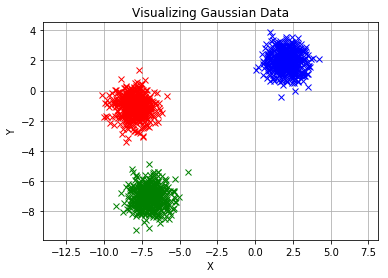

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Generate 2D gaussian data
variance = 0.5
mu1  = [2, 2]
cov1 = [[variance, 0],[0, variance]]  

mu2  = [-7, -7]
cov2 = [[variance, 0],[0, variance]]  

mu3  = [-8, -1]
cov3 = [[variance, 0],[0, variance]]  

num_pts = 500
num_classes = 3

x1, y1 = np.random.multivariate_normal(mu1, cov1, num_pts).T
x2, y2 = np.random.multivariate_normal(mu2, cov2, num_pts).T
x3, y3 = np.random.multivariate_normal(mu3, cov3, num_pts).T

# Plot data
plt.plot(x1, y1, 'bx')
plt.plot(x2, y2, 'gx')
plt.plot(x3, y3, 'rx')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualizing Gaussian Data')
plt.grid()
plt.show()


b) Randomly split all the data and labels into training and testing sets using an $85\%$/$15\%$  train/test split. 

In [5]:
# Using Gaussian Data, apply LDA to obtain decision boundaries that we will plot. 

X = np.array(np.concatenate((x1,x2,x3),axis=0)).reshape(-1,1)
Y = np.array(np.concatenate((y1,y2,y3),axis=0)).reshape(-1,1)
LABELS = np.array(np.concatenate((np.ones((1,num_pts)),2*np.ones((1,num_pts)),3*np.ones((1,num_pts))),axis=0)).reshape(-1,1)
DATA = np.concatenate((X,Y),axis=1)
#print(X.shape)
#print(Y)
#print(DATA)
#print(LABELS)

# randomly split data into train and test
percent_train = 0.85
total_points = num_classes*num_pts # 1500
indices_original = np.arange(total_points)
shuffled_indices = random.sample(list(indices_original), len(indices_original))
DATA_shuffled = DATA[shuffled_indices]
LABELS_shuffled = LABELS[shuffled_indices]


X_train = DATA_shuffled[:round(percent_train*total_points)]
Y_train = LABELS_shuffled[:round(percent_train*total_points)]
X_test = DATA_shuffled[round(percent_train*total_points):]
Y_test = LABELS_shuffled[round(percent_train*total_points):]

#print(DATA)
#print(DATA_shuffled)
#print(X_train)
#print(Y_train)
#print(X_test)
#print(Y_test)

#X_train[0]

(1500, 1)


c) Obtain the necessary parameter values for ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$) used for obtaining the LDA decision rule derived in Q$1$.  As a reminder, the preceding values can be obtained as:

$\widehat{p}(y) = \frac{n_y}{n}$,

$\widehat{\boldsymbol{\mu}}_y = \frac{1}{n_y} \sum_{i \in \{ 1,...,n\}: y = y_i} \boldsymbol{x}_i$,

$\widehat{\Sigma} = \frac{1}{n} \sum_{i=1}^n (\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})(\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})^T$,

where $n$ is the number of training data points and $n_y$ is the number of occurrences of class $y$ in the training set. 

Please display the resulting values of the preceding variables using print statements.  

In [340]:
# apply LDA - parameters obtain to form decision rule

# n - number of training points
n = round(total_points*percent_train)

p_array = np.zeros((1,num_classes))
for i in np.arange(num_classes):
    class_label = i + 1
    #print(class_label)
    n_y = np.sum(Y_train==class_label)
    #print(Y_train==class_label)
    p_array[0][i] = n_y/n
print('p: ')
print(p_array)

empirical_means = np.zeros((num_classes,2))
for i in np.arange(num_classes):
    class_label = i+1
    n_y = np.sum(Y_train==class_label)
    for j in np.arange(2):
        indices_of_class = Y_train==class_label
        empirical_means[i,j] += (1/n_y)*np.sum(X_train[indices_of_class.ravel(),j])
print('Empirical means: ')        
print(empirical_means)        

for i in np.arange(n):
    if i==0:
        covariance_matrix = (1/n)*(X_train[i].reshape(-1,1)-empirical_means[int(Y_train[i])-1].reshape(-1,1))@(X_train[i].reshape(-1,1)-empirical_means[int(Y_train[i])-1].reshape(-1,1)).T
    else:
        covariance_matrix += (1/n)*(X_train[i].reshape(-1,1)-empirical_means[int(Y_train[i])-1].reshape(-1,1))@(X_train[i].reshape(-1,1)-empirical_means[int(Y_train[i])-1].reshape(-1,1)).T
print('Covariance matrix: ')
print(covariance_matrix)

p: 
[[0.33333333 0.33537255 0.33129412]]
Empirical means: 
[[ 1.9741229   2.01849692]
 [-7.01034018 -6.97891083]
 [-8.00387467 -1.01455034]]
Covariance matrix: 
[[0.50448332 0.00560337]
 [0.00560337 0.50538298]]


d) Since we know ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$), we can in turn obtain the LDA decision rule. Let:

$\boldsymbol{\beta}_y = \boldsymbol{\mu}_y^T \Sigma^{-1}$,

$\alpha_y = - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))$;

with this, the LDA decision rule can be re-expressed as:

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y \text{ } \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$.  

The objective function in the preceding equation basically projects $\boldsymbol{x}$ into $1$ dimension and offsets it.  

Obtain and display the values of $\boldsymbol{\beta}_y \forall y$ and $\alpha_y \forall y$ using print statements.

In [341]:
# Using built in function
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LinearDiscriminantAnalysis()
#clf.fit(X_train, Y_train.ravel())

#### Get parameters: \beta_y, \alpha_y \forall y \in \{ 1,...,m \}:

BETA = np.zeros((num_classes,2))
for i in np.arange(num_classes):
    class_label = i+1
    BETA[i,:] = empirical_means[i].reshape(-1,1).T @ np.linalg.inv(covariance_matrix)
print('Beta: ')
print(BETA)

ALPHA = np.zeros((num_classes,1))
for i in np.arange(num_classes):
    ALPHA[i] = (-1/2)*empirical_means[i].reshape(-1,1).T @ np.linalg.inv(covariance_matrix) @ empirical_means[i].reshape(-1,1) + np.log(p_array[0][i])
print('Alpha: ')
print(ALPHA)


Beta: 
[[  3.86927258   3.9510946 ]
 [-13.74439173 -13.65676372]
 [-15.8451432   -1.8318072 ]]
Alpha: 
[[ -8.90545823]
 [-96.92361222]
 [-65.44524921]]


e) Using the derived LDA decision rule, obtain and display the Correct Classification Rates (CCR) for the training and testing sets. Also, explain the resulting CCRs.

In [342]:
#### Get train and test CCRs

# Train CCR
Y_empirical_train = np.zeros((len(Y_train),1))
metric_vals = np.zeros((num_classes,1))

for i in np.arange(len(Y_train)):
    # for every test point, obtain metric (\beta_y.T @ x_test + \alpha_y)
    for j in np.arange(num_classes):
        metric_vals[j] = BETA[j,:].reshape(-1,1).T @ X_train[i,:].reshape(-1,1) + ALPHA[j] 
    idx_max = np.argmax(metric_vals)
    Y_empirical_train[i] = int(idx_max)+1

train_CCR = np.sum(Y_train==Y_empirical_train)/len(Y_empirical_train)
print('LDA - Train CCR: ',train_CCR)

# Test CCR
Y_empirical_test = np.zeros((len(Y_test),1))
metric_vals = np.zeros((num_classes,1))

for i in np.arange(len(Y_test)):
    # for every test point, obtain metric (\beta_y.T @ x_test + \alpha_y)
    for j in np.arange(num_classes):
        metric_vals[j] = BETA[j,:].reshape(-1,1).T @ X_test[i,:].reshape(-1,1) + ALPHA[j]    
    idx_max = np.argmax(metric_vals)
    Y_empirical_test[i] = int(idx_max)+1
    
test_CCR = np.sum(Y_test==Y_empirical_test)/len(Y_empirical_test)
print('LDA - Test CCR: ',test_CCR)

# explanation:  data is very different, hard to confuse classes, CCR will be very high since boundaries will be accurate. 
# if larger variance and overlap between classes occured, then there will be smaller CCRs.  

LDA - Train CCR:  1.0
LDA - Test CCR:  1.0


f) Here, we will test our LDA classifier on $5$ new data points:
    
$\boldsymbol{x}_1 = [10,10],\boldsymbol{x}_2 = [-10,10],\boldsymbol{x}_3 = [-10,-10],\boldsymbol{x}_4 = [10,-10],\boldsymbol{x}_5 = [0,0]$

Plot these new test points along with the original Gaussian data on a new figure. For each new test point, compute the score of the test point belonging to class $y \text{ } \forall \text{ } y \in \{1,...,m \}$ as:  $\text{score}_y = \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$ and display the scores using print statements.  

Describe the resulting scores and rationalize why they make sense based on proximity of a new test point to a certain data cluster.   

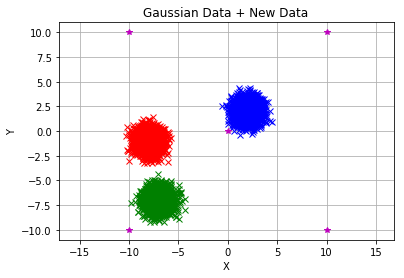

KEY:  Blue - 1, Green - 2, Red - 3

[[ 10  10]
 [-10  10]
 [-10 -10]
 [ 10 -10]
 [  0   0]]
[[  69.29821359 -370.93516672 -242.21475317]
 [  -8.08723811  -96.04733214   74.6881108 ]
 [ -87.10913006  177.08794229  111.32425476]
 [  -9.72367836  -97.7998923  -205.57860922]
 [  -8.90545823  -96.92361222  -65.44524921]]


In [335]:
# Display scores for 5 points using LDA model:

X_new = np.array([[10,10],[-10,10],[-10,-10],[10,-10],[0,0]])

# plot data with new X points:
plt.plot(x1, y1, 'bx')
plt.plot(x2, y2, 'gx')
plt.plot(x3, y3, 'rx')
plt.plot(X_new[:,0],X_new[:,1],'m*')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Data + New Data')
plt.grid()
plt.show()

# Place scores for each point in matrix
scores = np.zeros((X_new.shape[0],num_classes))
for i in np.arange(X_new.shape[0]):
    for j in np.arange(num_classes):
        scores[i,j] = BETA[j,:].reshape(-1,1).T @ X_new[i,:].reshape(-1,1) + ALPHA[j]
print('KEY:  Blue - 1, Green - 2, Red - 3\n')

print(X_new)
print(scores)

# explain resulting scores:
# the larger the score, the closer a class to the test point (since we are doing argmax)

**3) Logistic Regression**

In this problem, we will implement Logistic Regression using the built in capability (from sklearn).

Form a Logistic Regression classifer using the training data from Q$2$ and apply it to the training and testing sets from Q$2$. Obtain the CCRs for the training and testing sets; also, explain the resulting CCRs. 

In [318]:
# Using same data as before, obtain train and test CCRs

from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train.ravel())

# training CCR
Y_empirical_train = LRM.predict(X_train).reshape(-1,1)
train_CCR = np.sum(Y_test==Y_empirical_train)/len(Y_empirical_train)
print('LR - Train CCR: ',test_CCR)

# testing CCR
Y_empirical_test = LRM.predict(X_test).reshape(-1,1)
test_CCR = np.sum(Y_test==Y_empirical_test)/len(Y_empirical_test)
print('LR - Test CCR: ',test_CCR)

# explanation:  data is very different, hard to confuse classes, CCR will be very high.
# if larger variance and overlap between classes occured, then there may be smaller CCRs.  

LR - Train CCR:  1.0
LR - Test CCR:  1.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
